In [122]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline

In [123]:
#implementing k mean algorithm

#np.linalg.norm(...): This function calculates the norm (magnitude) of the resulting vector. By default, np.linalg.norm calculates the Euclidean norm 
#(or L2 norm), which is the square root of the sum of the squared differences of each dimension.

#np.argmin(distance): The np.argmin function returns the index of the minimum value in the array distance.
def find_closest_centroids(X,centroids):
    #set k
    k=centroids.shape[0]
    #you need to return these variables correctly
    idx=np.zeros(X.shape[0],dtype=int)
    for i in range(X.shape[0]):
        #array to hold the distance between each X[i] and centroid[j]
        distance=[]
        for j in range(k):
            norm_ij=np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)

        idx[i]=np.argmin(distance)

    return idx
    

In [124]:
# Load an example dataset that we will be using
X = load_data()
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [125]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

First three elements in idx are: [0 2 1]
All tests passed!


In [126]:
#computing centroids
def compute_centroids(X,idx,K):
    #useful variables
    m,n=X.shape
    #have to return these variables
    centroid=np.zeros((K,n))
    for k in range(K):
        points=X[idx==k]
        centroid[k]=np.mean(points,axis=0)

    return centroid


In [127]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


In [128]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


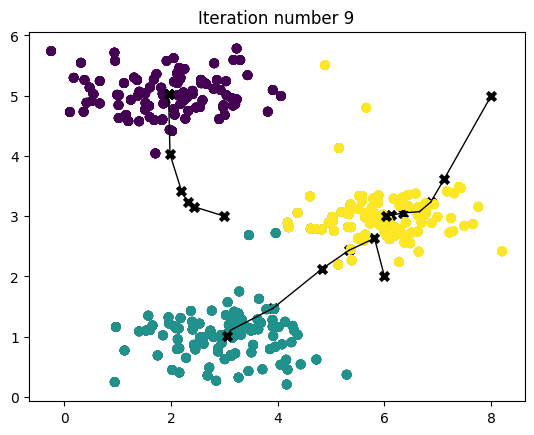

In [129]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [130]:
#random initialization
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

4 - Image compression with K-means
In this exercise, you will apply K-means to image compression.

In a straightforward 24-bit color representation of an image
, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors. * By making this reduction, it is possible to represent (compress) the photo in an efficient way. * Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).
In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.

Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

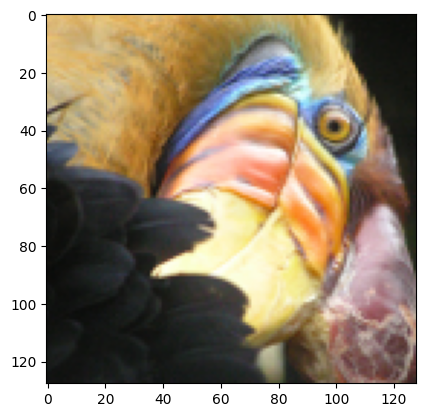

In [131]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

# Visualizing the image
plt.imshow(original_img)

In [132]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)



As you can see, this creates a three-dimensional matrix original_img where

the first two indices identify a pixel position, and
the third index represents red, green, or blue.
For example, original_img[50, 33, 2] gives the blue intensity of the pixel at row 50 and column 33.

Processing data
To call the run_kMeans, you need to first transform the matrix original_img into a two-dimensional matrix.

The code below reshapes the matrix original_img to create an m x 3
 matrix of pixel colors (where m =16384=128x128
)

In [133]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [134]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 24                      
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [135]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

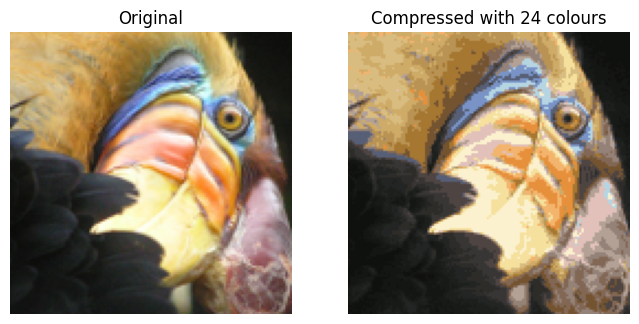

In [136]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()